<a href="https://colab.research.google.com/github/DoraSzasz/covid_19_visualization_workshop/blob/master/1_Epidemics_Mathematical_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **THE SIR MODEL**

---



## References

*  https://mathworld.wolfram.com/SIRModel.html
*  https://mathworld.wolfram.com/Kermack-McKendrickModel.html
*  https://youtu.be/gxAaO2rsdIs

## Definitions

*  S = Susceptibles
*  I = Infected
*  R = Recovered (Removed)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:

number_of_time_periods = 24 * 3 * 30   # hourly for 3 months
time_range_hours = range(0, number_of_time_periods)
time_range_days = [ hour / 24.0 for hour in time_range_hours]

regional_population = 12000000.0   #  Close to the City of Chicago population

S = regional_population
I = 1.0
R = 0.0

initial_conditions = { 'Susceptibles' : [S] * number_of_time_periods, 'Infected' : [I]*number_of_time_periods, 'Recovered': [R]*number_of_time_periods}

sir = pd.DataFrame(data=initial_conditions, index=time_range_days)


social_contact_per_day = 0.4
social_contact_per_hour = social_contact_per_day / 24.0

infection_rate_per_hour = social_contact_per_hour / regional_population

recovery_rate_per_day = 0.09
recovery_rate_per_hour = recovery_rate_per_day / 24.0

B = infection_rate_per_hour
L = recovery_rate_per_hour

R0 = S * B / L

In [0]:
for t in time_range_hours: 

  sir.iloc[t]['Susceptibles'] = S
  sir.iloc[t]['Infected'] = I
  sir.iloc[t]['Recovered'] = R

  new_infections = B * I * S
  new_recoveries = L * I

  dS = - new_infections
  dI =   new_infections - new_recoveries
  dR =                    new_recoveries

  S = S + dS
  I = I + dI
  R = R + dR

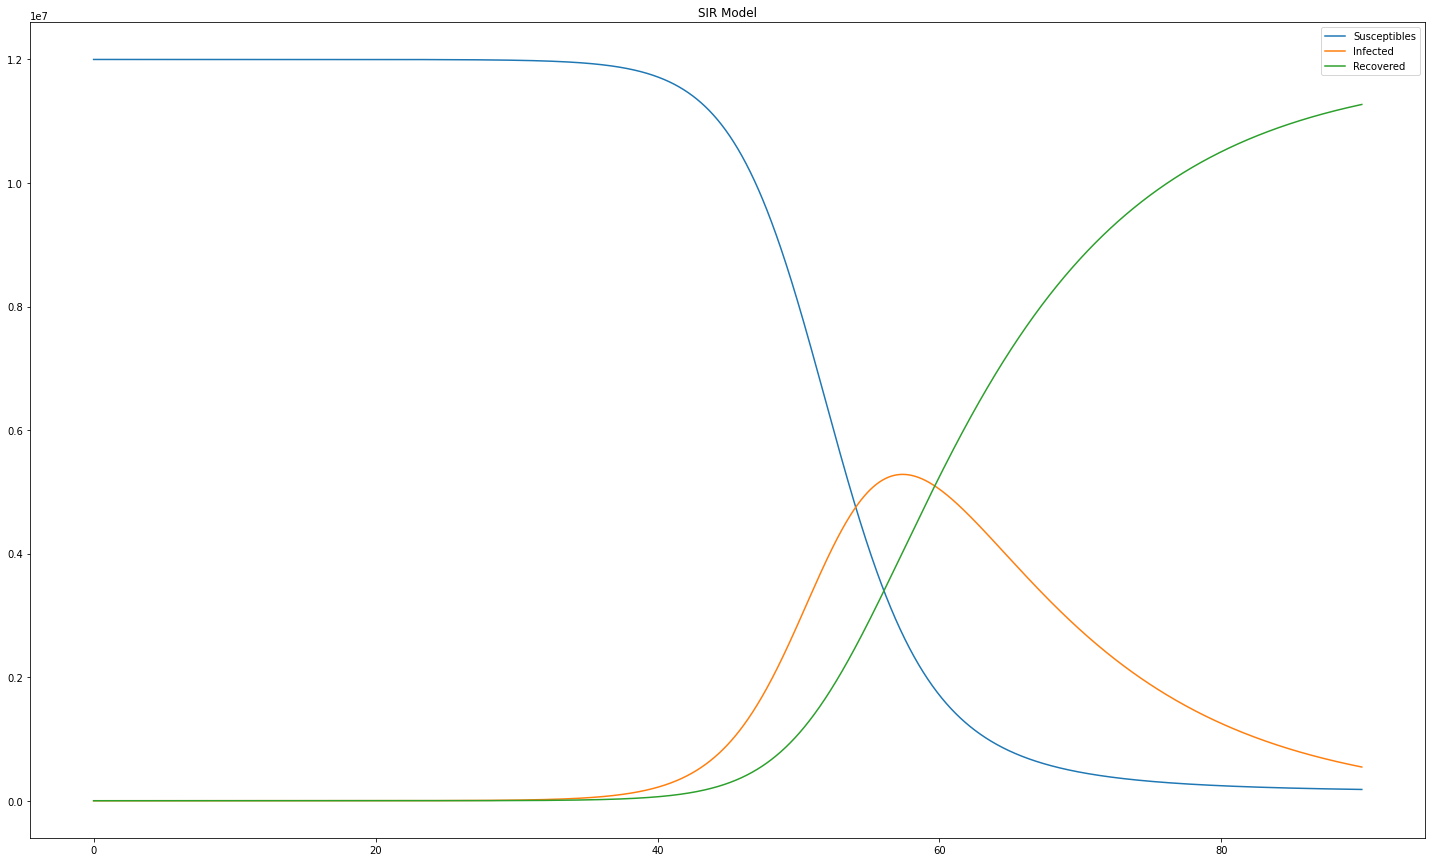

In [0]:
sir.plot.line(title='SIR Model', figsize=[25,15]);

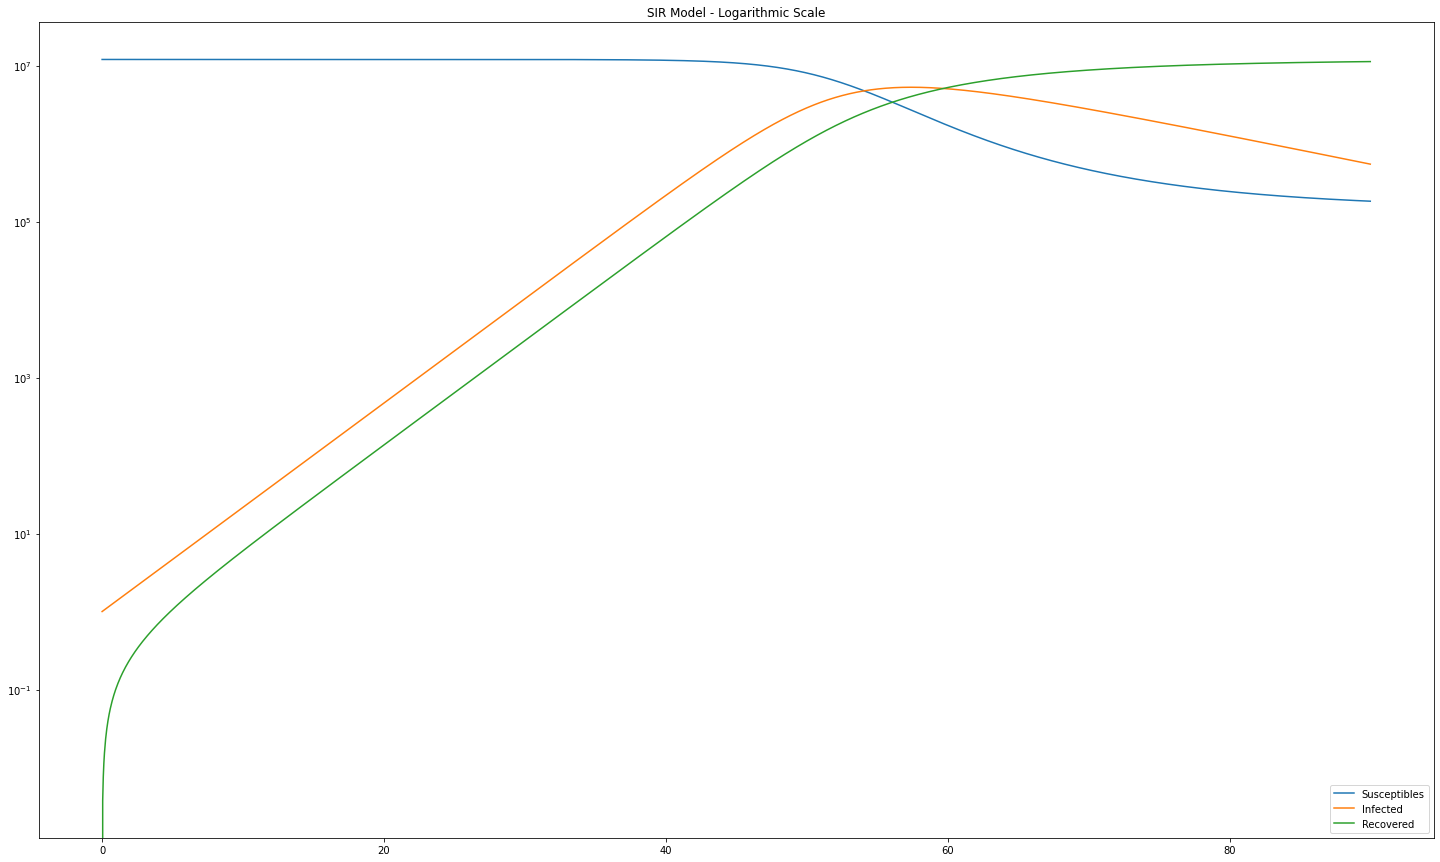

In [0]:
sir.plot.line(title='SIR Model - Logarithmic Scale', figsize=[25,15], logy=True);

#  Comparison with Actual Data in Illinois

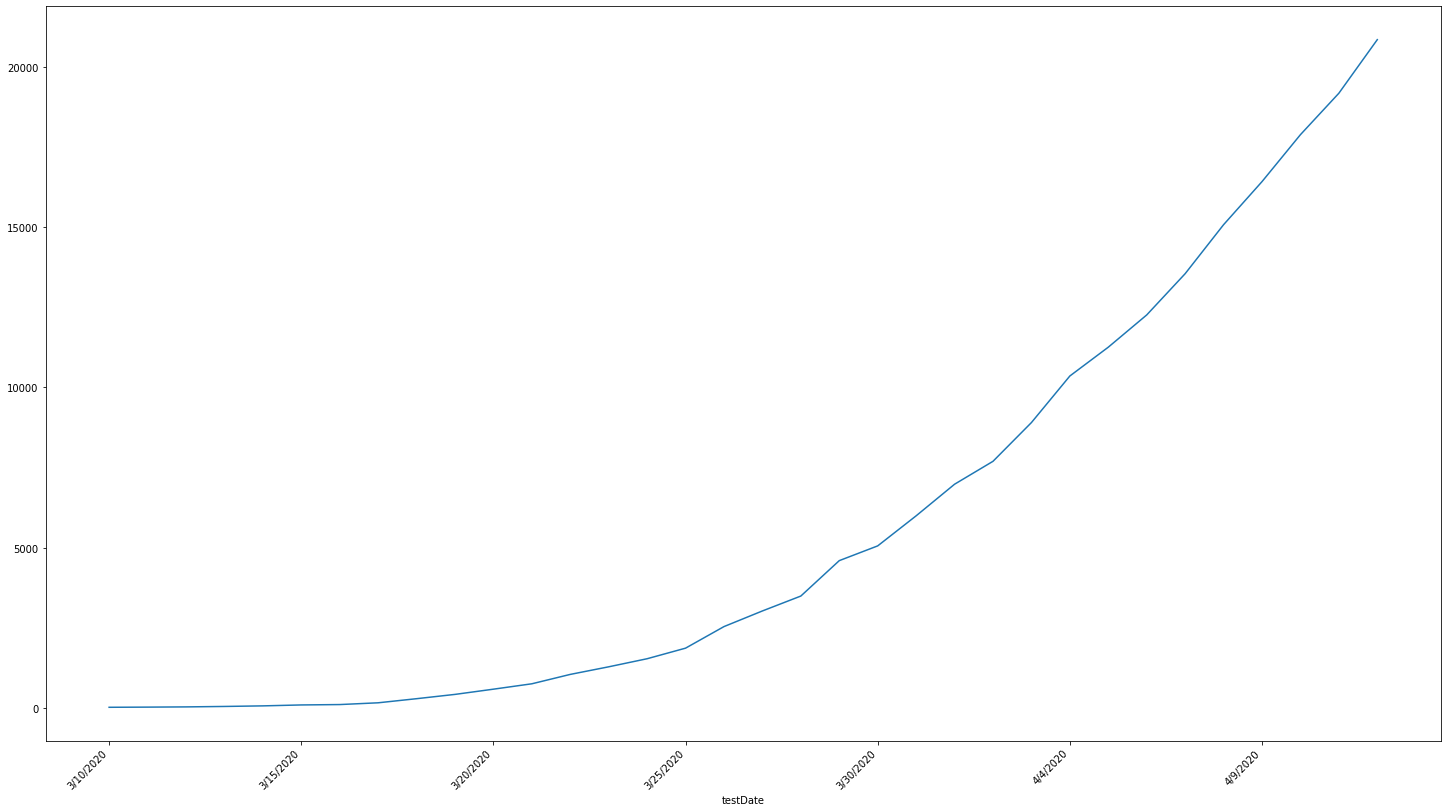

In [0]:
cases_history = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results.csv")
cases_history.set_index('testDate', drop=True, inplace=True)
confirmed_cases = cases_history['confirmed_cases']
confirmed_cases.plot.line(rot=45, subplots=True, figsize=[25,15]);

In [0]:
sir_mapped = [ sir['Infected'].iloc[day*24] for day in range(0,34)]
infected_cases = pd.Series(data=sir_mapped, name='infected', index=confirmed_cases.index)
ic = pd.concat([confirmed_cases, infected_cases], axis=1)

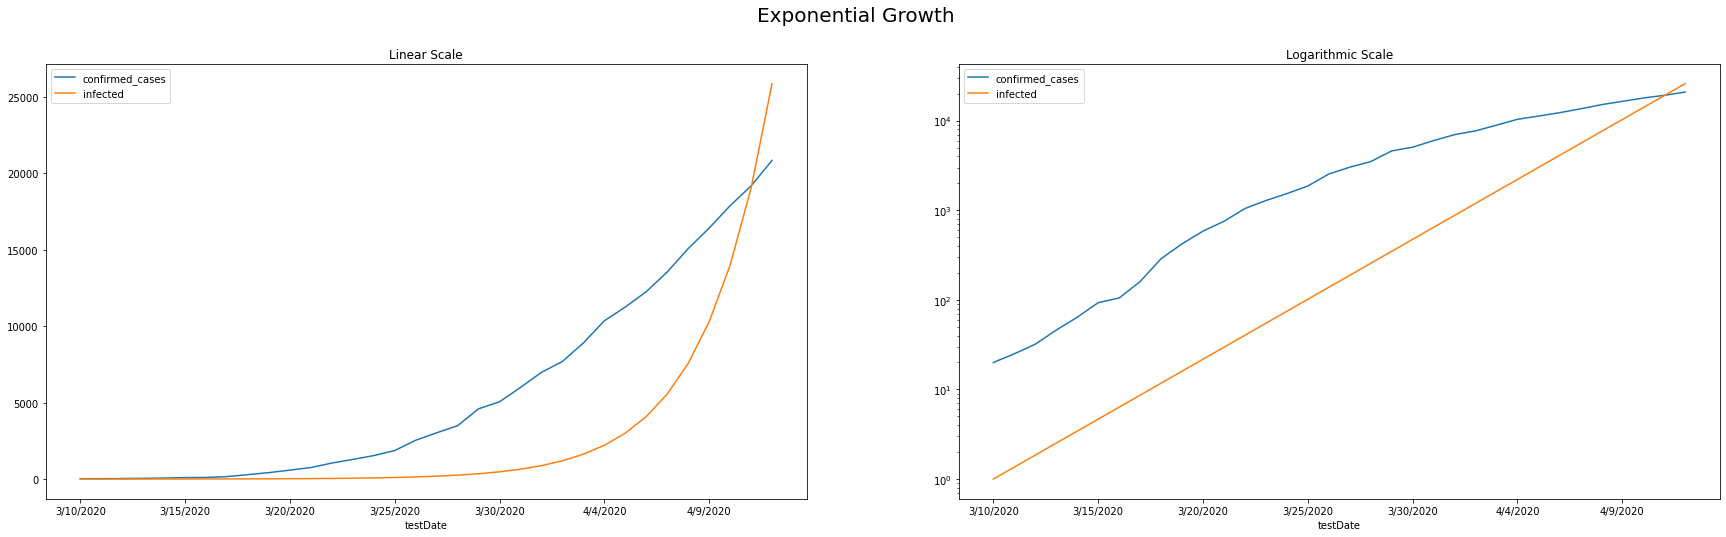

In [0]:
fig, axes = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('Exponential Growth', fontsize=20)

ic.plot.line(ax=axes[0], title='Linear Scale');
ic.plot.line(ax=axes[1], title='Logarithmic Scale', logy=True);

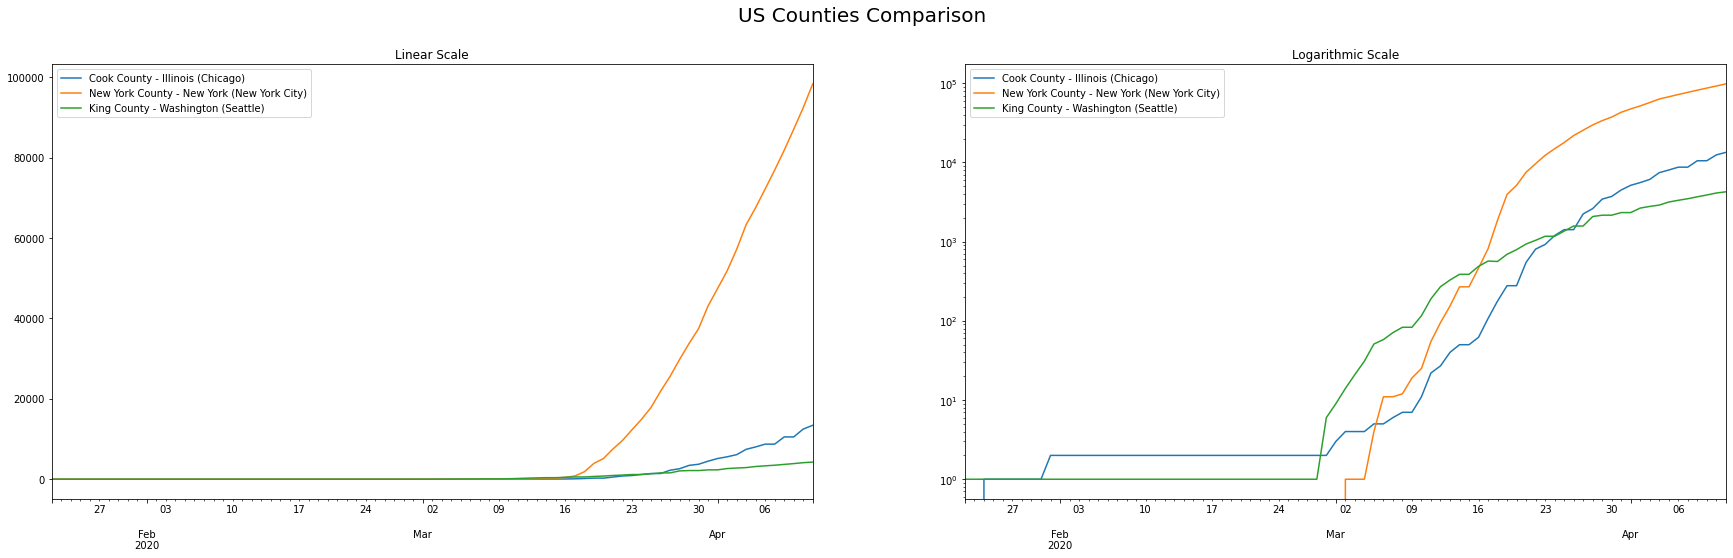

In [0]:
confirmed_usa = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
states_data = confirmed_usa[confirmed_usa['Province_State'].isin(['Illinois', 'New York', 'Washington'])]
chi_nyc_data = states_data[states_data['Admin2'].isin(['New York','Cook', 'King'])]
chi_nyc_data = chi_nyc_data.T.iloc[11:]   # Transpose and remove first 11 rows
chi_nyc_data = chi_nyc_data.rename(columns={1863: "New York County - New York (New York City)", 615: "Cook County - Illinois (Chicago)", 2974: "King County - Washington (Seattle)"})
chi_nyc_data.index = pd.to_datetime(chi_nyc_data.index)

fig, axes = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('US Counties Comparison', fontsize=20)

chi_nyc_data.plot.line(ax=axes[0], title='Linear Scale');
chi_nyc_data.plot.line(ax=axes[1], title='Logarithmic Scale', logy=True);

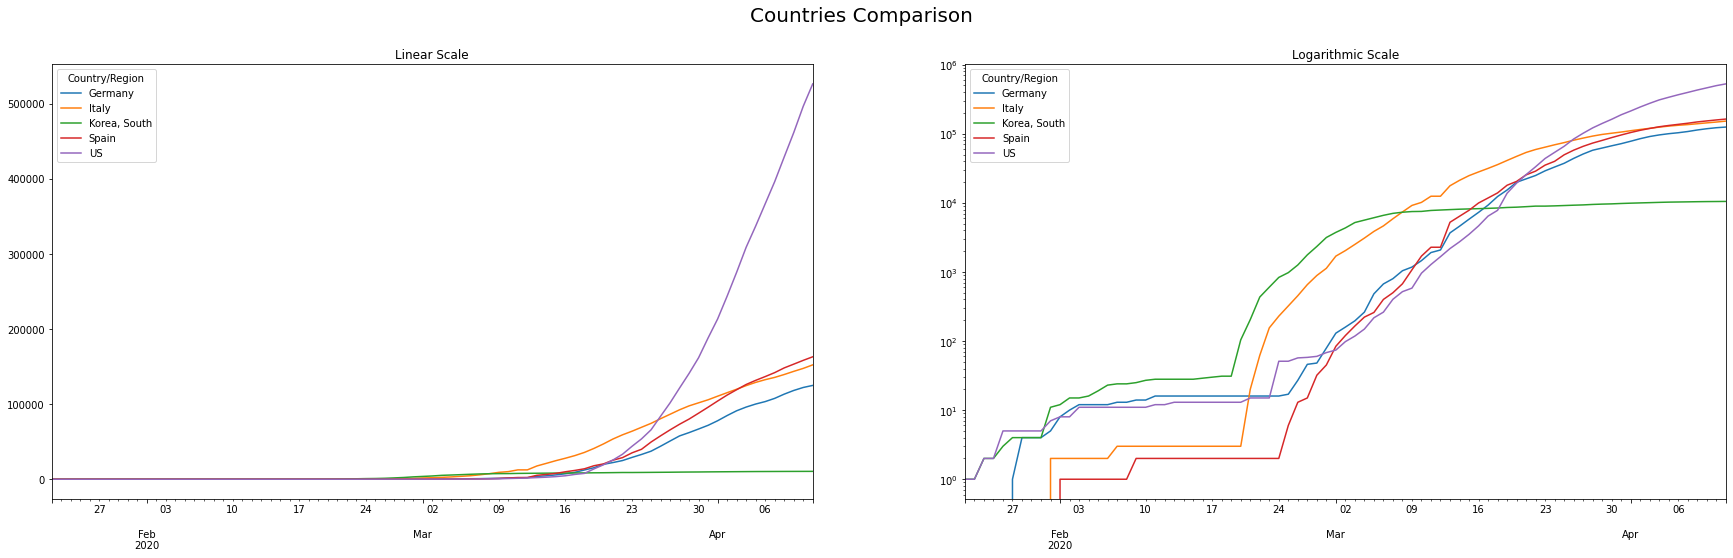

In [0]:
confirmed_global = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
selected_countries = ['Germany', 'Italy', 'Spain', 'US', 'Korea, South']
selected_countries_data = confirmed_global[confirmed_global['Country/Region'].isin(selected_countries)]
selected_countries_data = selected_countries_data.T            # Transpose
selected_countries_names = selected_countries_data.iloc[1]
selected_countries_data.columns = selected_countries_names
selected_countries_data = selected_countries_data.iloc[4:]     # Transpose and remove first 4 rows
selected_countries_data.index = pd.to_datetime(selected_countries_data.index)

fig, axes = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('Countries Comparison', fontsize=20)

selected_countries_data.plot.line(ax=axes[0], title='Linear Scale');
selected_countries_data.plot.line(ax=axes[1], title='Logarithmic Scale', logy=True);